## Analysis of Manipulation techniques for MantalManip dataset

In [11]:

import sys
import io
import pandas as pd
import numpy as np
from datasets import load_dataset
import seaborn as sns
import matplotlib.pyplot as plt



old_stdout = sys.stdout
sys.stdout = mystdout = io.StringIO()
!pip install datasets > /dev/null 2>&1
sys.stdout = old_stdout
!pip install seaborn > /dev/null 2>&1

Libraries


## Dataset Loading .

In [12]:
from datasets import load_dataset

dataset = load_dataset("audreyeleven/MentalManip", "mentalmanip_con")
print()

df = pd.DataFrame(dataset["train"])

print(dataset["train"]["dialogue"][:5])
print()

print("Manipulative labels:", dataset["train"]["manipulative"][:5])


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/5.06k [00:00<?, ?B/s]

Some datasets params were ignored: ['license']. Make sure to use only valid params for the dataset builder and to have a up-to-date version of the `datasets` library.


mentalmanip_con.csv:   0%|          | 0.00/1.64M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/2915 [00:00<?, ? examples/s]


['Person1: Jesus! Listen to this one: "Do you remember me? Airport shuttle, June 7th. You: striking redhead with yellow dress, pearl necklace, brown shoes. I was the bookish fellow in the green cardigan who helped you find your contact lens. Am I crazy, or did we have a moment?"\nPerson2: God, that\'s so pathetic. I bet she didn\'t even notice him.\nPerson1: I know. And he\'s like psychotically obsessing over every little detail.\nPerson2: We should call him and pretend to be the redhead.\nPerson1: Oh, we totally have to.', "Person1: I don't know.\nPerson2: Don't go.\nPerson1: I have to... he's a G-34\nPerson2: You don't have to... I don't trust him.  You ought to file a report.\nPerson1: No, don't make trouble.  It's nothing.", "Person1: You're mine, you know.  I made you.\nPerson2: I know.\nPerson1: If you went away, what would become of me?\nPerson2: I'm grown up now.  I have to leave some time.\nPerson1: Of course you do, and I want you to... but there's no need to hurry it along,

In [13]:
## OVERVIEW OF THE DATASET

In [14]:
#Check the number of rows in the training set
num_rows = len(dataset["train"])
print(f"Number of rows in the training set: {num_rows}")

Number of rows in the training set: 2915


## The dataset contains columns like “dialogue”,”manipulation”,”vulnerability”,and 		“techniques”.

In [15]:
 #Check the column names in the dataset
columns = dataset["train"].column_names
print("Columns in the dataset:")
print(columns)
print()

Columns in the dataset:
['id', 'dialogue', 'manipulative', 'technique', 'vulnerability']



##  Counts how many manipulation are label as manipulation and how many are 			labeled as non-manipulation .

##  1 = Manipulation , 0 = Non-Manipulation

In [16]:
 #Count the distribution of 'Manipulative' labels
manipulative_counts = pd.Series(dataset["train"]["manipulative"]).value_counts()
print("Distribution of 'Manipulative' labels:")
print(manipulative_counts)
print()

Distribution of 'Manipulative' labels:
1    2016
0     899
Name: count, dtype: int64



## Counted unique techniques in the dataset Unique techniques and their counts:

In [17]:
# Count and display unique techniques and their counts
if "technique" in dataset["train"].column_names:
    technique_counts = {}


    for techniques_list in dataset["train"]["technique"]:
        if techniques_list:

            for technique in techniques_list.split(","):
                technique = technique.strip()
                if technique:
                    technique_counts[technique] = technique_counts.get(technique, 0) + 1

    # Print the unique techniques and their counts
    print("\nUnique techniques and their counts:")
    for technique, count in sorted(technique_counts.items(), key=lambda x: x[0]):
        print(f"{technique}: {count}")
else:
    print("The 'Technique' column is not present in the dataset.")



Unique techniques and their counts:
Accusation: 361
Brandishing Anger: 133
Denial: 87
Evasion: 83
Feigning Innocence: 58
Intimidation: 321
Persuasion or Seduction: 607
Playing Servant Role: 30
Playing Victim Role: 69
Rationalization: 213
Shaming or Belittlement: 384


###  "Persuasion or Seduction" is the most common technique, appearing 607 times, which suggests it is a prevalent method of manipulation.
 ### "Playing Servant Role" is the least common, occurring only 30 times, indicating it might be less effective or less commonly used.**

## Count rows with no techniques in the dataset

In [18]:

if "technique" in dataset["train"].column_names:
    no_technique_count = sum(1 for techniques_list in dataset["train"]["technique"] if not techniques_list)
    print(f"Number of rows without any techniques: {no_technique_count}")
else:
    print("The 'Technique' column is not present in the dataset.")


Number of rows without any techniques: 1167


## These 1167 rows represent dialogues or instances in the dataset where no specific manipulative techniques have been annotated or detected.


## Counted Vulnerability Labels : The vulnerability column from the dataset contains various vulnerability categories.


In [19]:
#Count the distribution of 'Vulnerability' labels
vulnerability_counts = pd.Series(dataset["train"]["vulnerability"]).value_counts()
print("Distribution of 'Vulnerability' labels:")
print(vulnerability_counts)
print()

Distribution of 'Vulnerability' labels:
Dependency                                        243
Low self-esteem                                   124
Naivete                                            74
Over-responsibility                                66
Over-intellectualization                           34
Dependency,Low self-esteem                         12
Dependency,Over-responsibility                      9
Over-responsibility,Low self-esteem                 7
Naivete,Low self-esteem                             5
Naivete,Dependency                                  5
Dependency,Naivete                                  4
Over-responsibility,Over-intellectualization        4
Dependency,Over-intellectualization                 3
Low self-esteem,Dependency                          3
Naivete,Over-intellectualization                    2
Over-responsibility,Dependency                      2
Low self-esteem,Naivete                             1
Over-responsibility,Naivete               

## Single Vulnerabilities:
Dependency: Appears 243 times, making it the most frequent vulnerability.       

Low self-esteem: Occurs 124 times, the second most common vulnerability.

## Combinations of Vulnerabilities:

Dependency, Low self-esteem: Appears 12 times, indicating that these two vulnerabilities frequently co-occur.

Dependency, Over-responsibility: Found 9 times, suggesting a notable combination.

In [20]:
## Graphs and visual Analysis

* Fig 1:-The bar chart visualizes the counts of unique manipulative techniques observed in the dataset. Each bar represents a specific technique, with its height corresponding to the frequency of that technique.

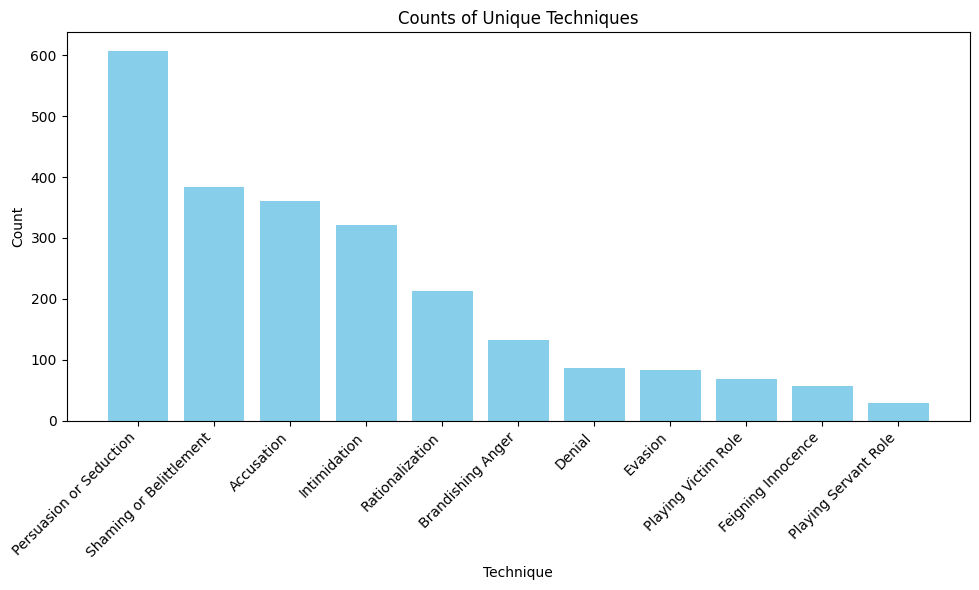

In [21]:
import matplotlib.pyplot as plt

# Plot the technique counts
techniques, counts = zip(*sorted(technique_counts.items(), key=lambda x: x[1], reverse=True))
plt.figure(figsize=(10, 6))
plt.bar(techniques, counts, color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.title("Counts of Unique Techniques")
plt.xlabel("Technique")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


* "Persuasion or Seduction":
This is the most frequently used technique, occurring approximately 607 times.

* "Shaming or Belittlement":
The second most frequent technique, used 384 times, suggests its significant role in manipulative communication.

Understanding the frequency of techniques helps identify which manipulative strategies dominate in the data offering us insights .

* Fig 2:- Distribution of unique vulnerability types

<ipython-input-22-3099416894fc>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='vulnerability', data=df, palette='viridis')  # Use a visually appealing palette


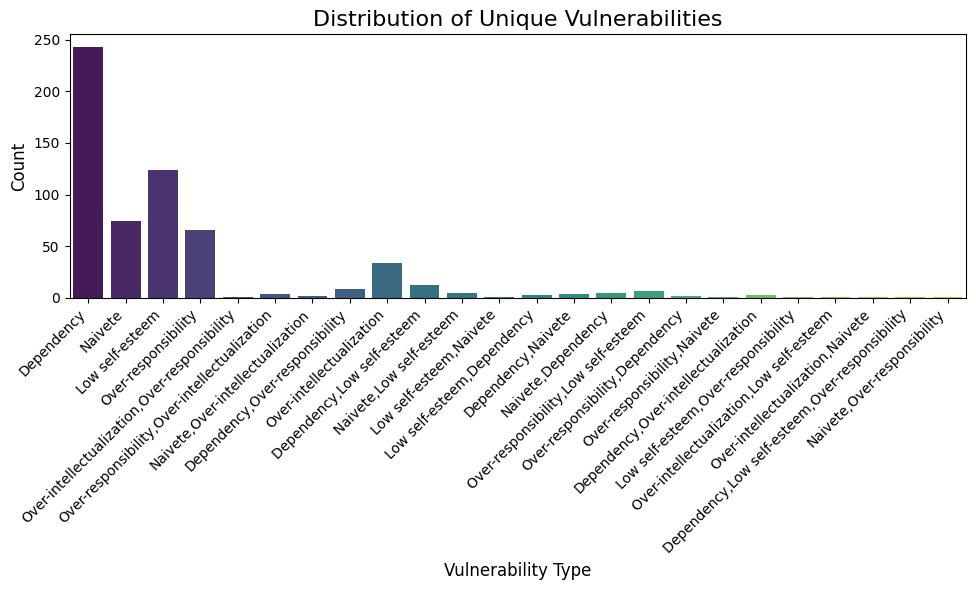

In [22]:

plt.figure(figsize=(10, 6))
sns.countplot(x='vulnerability', data=df, palette='viridis')  # Use a visually appealing palette
plt.title('Distribution of Unique Vulnerabilities', fontsize=16) # Increase title font size
plt.xlabel('Vulnerability Type', fontsize=12) # Increase x-axis label font size
plt.ylabel('Count', fontsize=12) # Increase y-axis label font size
plt.xticks(rotation=45, ha='right', fontsize=10) # Rotate x-axis labels and increase font size
plt.yticks(fontsize=10) # Increase y-axis tick font size
plt.tight_layout()
plt.show()

* "Dependency":
Dependency is the most common vulnerability, appearing approximately 250 times.

* Low Self-Esteem" and "Naivete":
"Low self-esteem" and "Naivete" are the next most frequent vulnerabilities, indicating their importance in manipulative contexts.


Knowing the most common vulnerabilities helps identify which traits are most exploited in manipulative dialogues.


In [23]:
## Show the technique with the highest manipulation score.

In [24]:
if "technique" in dataset["train"].column_names:
    max_technique = max(technique_counts, key=technique_counts.get)
    max_count = technique_counts[max_technique]
    print(f"\nThe technique with the highest manipulation score is '{max_technique}' with a count of {max_count}")


The technique with the highest manipulation score is 'Persuasion or Seduction' with a count of 607


In [25]:

highest_manipulation = df.loc[df['manipulative'].idxmax()]

print("Dialogue with the highest manipulation score:")
print(highest_manipulation['dialogue'])
print("Manipulation Score:", highest_manipulation['manipulative'])

Dialogue with the highest manipulation score:
Person1: Jesus! Listen to this one: "Do you remember me? Airport shuttle, June 7th. You: striking redhead with yellow dress, pearl necklace, brown shoes. I was the bookish fellow in the green cardigan who helped you find your contact lens. Am I crazy, or did we have a moment?"
Person2: God, that's so pathetic. I bet she didn't even notice him.
Person1: I know. And he's like psychotically obsessing over every little detail.
Person2: We should call him and pretend to be the redhead.
Person1: Oh, we totally have to.
Manipulation Score: 1


* Fig 3: How many labels do we have of non-manipulation and manipulation

<ipython-input-26-3639c1d62bd9>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="manipulative", data=df, palette="coolwarm")


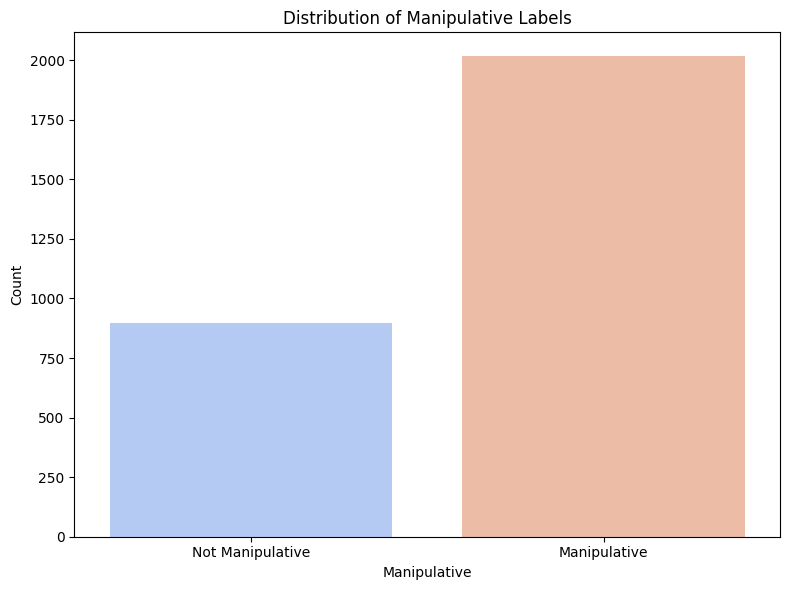

In [26]:
# Distribution of manipulative labels
if "manipulative" in df.columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x="manipulative", data=df, palette="coolwarm")
    plt.title("Distribution of Manipulative Labels")
    plt.xlabel("Manipulative")
    plt.ylabel("Count")
    plt.xticks([0, 1], ["Not Manipulative", "Manipulative"])
    plt.tight_layout()
    plt.show()


* The "Manipulative" class has a significantly higher count compared to the "Not Manipulative" class..

-> The class imbalance may lead to a model that is biased toward predicting the majority class ("Manipulative").

In [27]:
##Manipulation Across Vulnerability

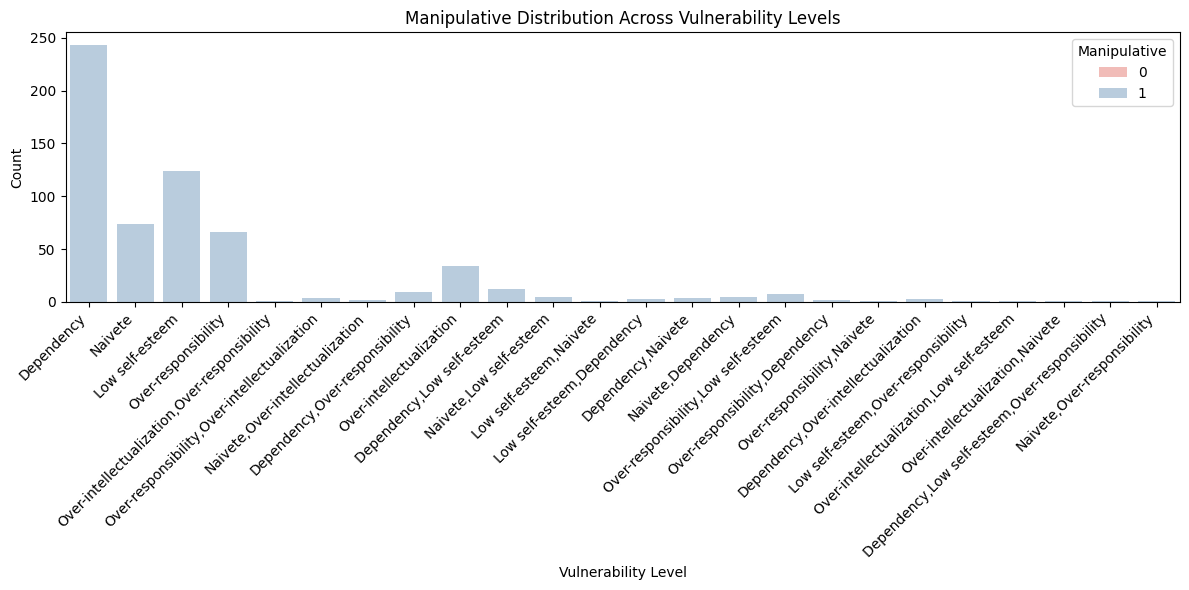

In [28]:
if "manipulative" in df.columns and "vulnerability" in df.columns:
    plt.figure(figsize=(12, 6))
    sns.countplot(x="vulnerability", hue="manipulative", data=df, palette="Pastel1")
    plt.title("Manipulative Distribution Across Vulnerability Levels")
    plt.xlabel("Vulnerability Level")
    plt.ylabel("Count")
    plt.xticks(rotation=45, ha="right")
    plt.legend(title="Manipulative")
    plt.tight_layout()
    plt.show()


* Dependency" and "Naivete" have high counts of manipulative individuals.
* "Over-intellectualization" or combinations (e.g., "Dependency, Over-intellectualization") have lower counts.

-> The chart likely examines whether certain vulnerability traits or their combinations correlate with manipulative behavior. The higher concentration of manipulative individuals in categories like "Dependency" may indicate a stronger association.

Fig 4:-  "Distribution of Techniques"

* The size of each slice is proportional to the percentage or frequency of that technique in the dataset.

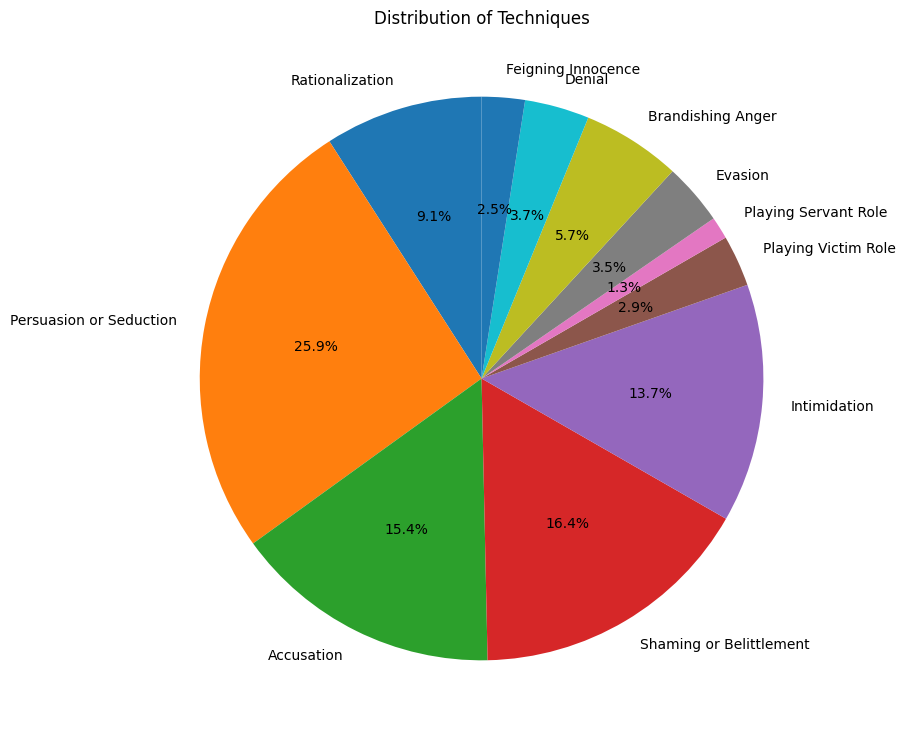

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 9))
plt.pie(technique_counts.values(), labels=technique_counts.keys(), autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Techniques')
plt.axis('equal')
plt.show()

* "Persuasion or Seduction" is the most frequently used technique, accounting for 25.9% of all cases.
* This pie chart likely aims to illustrate the prevalence of different behavioral or manipulative techniques in a dataset, providing insights into which strategies are most and least frequently employed. It can be useful for understanding behavioral patterns or tendencies in specific contexts.

* Fig 5: Character Count Distribution in dialogues

* The histogram illustrates the distribution of character counts in dialogue entries from a dataset. It shows how frequently dialogues of different character lengths appear.

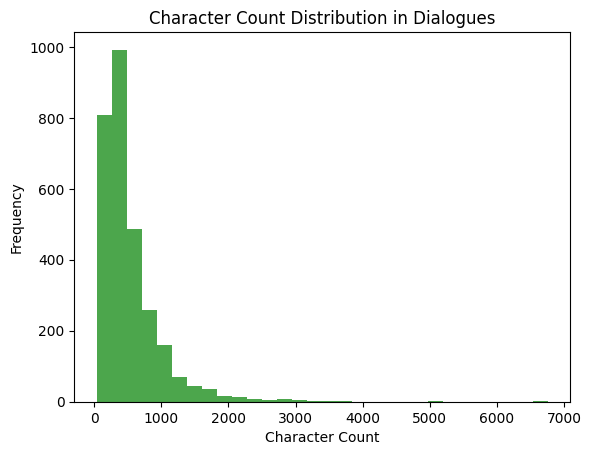

In [32]:
df['Char_Count'] = df['dialogue'].apply(len)

# Plot character count distribution
plt.hist(df['Char_Count'], bins=30, color='green', alpha=0.7)
plt.title('Character Count Distribution in Dialogues')
plt.xlabel('Character Count')
plt.ylabel('Frequency')
plt.show()


* The histogram shows a right-skewed distribution:
Majority of dialogues: Have lower character counts, mostly concentrated between 0 and 1000 characters.

* This analysis is useful for understanding the structure of dialogues in the dataset, particularly for preprocessing tasks like trimming long dialogues or analyzing average length distributions.

* Fig 6: The bar chart visualizes the word frequency comparison between two categories: manipulative and non-manipulative dialogues.

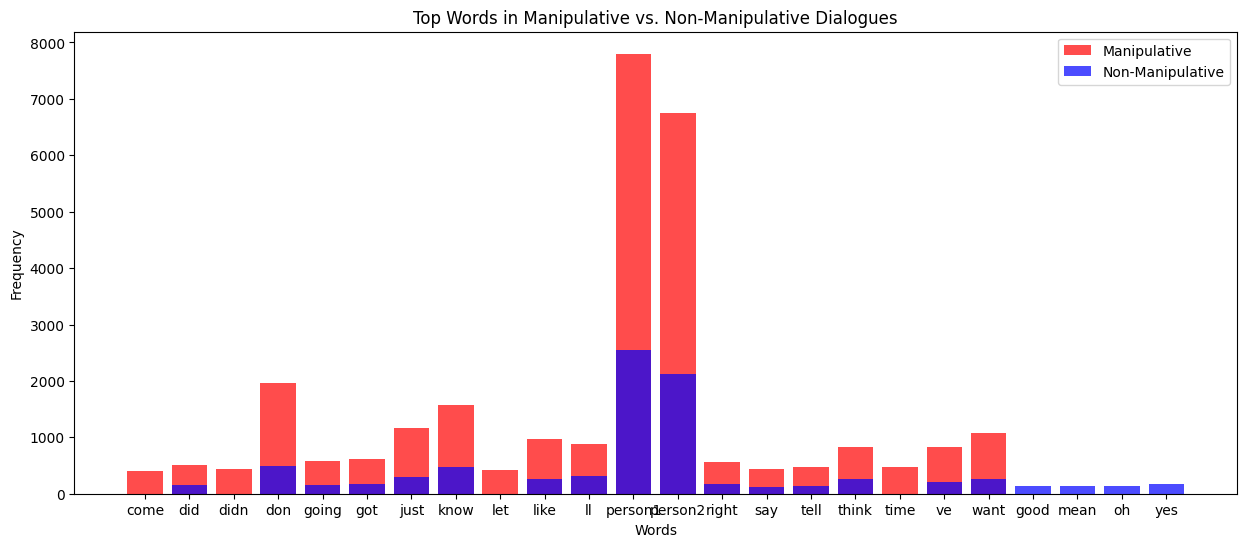

In [40]:
from sklearn.feature_extraction.text import CountVectorizer

# Vectorize the dialogues
vectorizer = CountVectorizer(stop_words='english', max_features=20)
X = vectorizer.fit_transform(df[df['manipulative'] == 1]['dialogue'])
manip_words = vectorizer.get_feature_names_out()

X_non = vectorizer.fit_transform(df[df['manipulative'] == 0]['dialogue'])
nonmanip_words = vectorizer.get_feature_names_out()

# Plot word frequencies
manip_freq = X.sum(axis=0).A1
nonmanip_freq = X_non.sum(axis=0).A1

plt.figure(figsize=(15,6 ))
plt.bar(manip_words, manip_freq, color='red', alpha=0.7, label='Manipulative')
plt.bar(nonmanip_words, nonmanip_freq, color='blue', alpha=0.7, label='Non-Manipulative')
plt.title('Top Words in Manipulative vs. Non-Manipulative Dialogues')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.legend()
plt.show()


* X-axis (Words):
Displays the most frequent words across both manipulative and non-manipulative dialogues.
Common examples include "person", "don", "want", and "time."

* Y-axis (Frequency):
Shows the total frequency (count) of each word in manipulative (red bars) and non-manipulative (blue bars) dialogues.
Words used more frequently in manipulative dialogues have taller red bars (e.g., "person" and "don").

Red bars: Frequencies in manipulative dialogues.
Blue bars: Frequencies in non-manipulative dialogues

In [43]:
## We can add more visulaization Marvin , if required do let me know .